In [108]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

%matplotlib inline

In [2]:
conn=mysql.connector.connect(
    host='localhost',
    password='sobhin@23012002',
    user='root',
    database='CP_Proj'
)
if conn.is_connected():
  print("Connection successful")

Connection successful


In [3]:
query = 'SELECT * FROM ad_click_data'
df = pd.read_sql(query, conn)
df.head()

C:\Users\somra\AppData\Local\Temp\ipykernel_13176\1233909634.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,id,user_id,ad_id,ad_category,ad_position,click,impression_date,user_age,user_gender,user_location
0,1,101,201,Electronics,Top,1,2024-10-01,25,Female,Mumbai
1,2,102,202,Fashion,Side,0,2024-10-01,30,Female,Delhi
2,3,103,203,Home & Garden,Bottom,0,2024-10-01,22,Female,Bangalore
3,4,104,204,Books,Top,1,2024-10-01,28,Male,Hyderabad
4,5,105,205,Toys,Side,1,2024-10-01,35,Female,Ahmedabad


In [4]:
df.tail()

,id,user_id,ad_id,ad_category,ad_position,click,impression_date,user_age,user_gender,user_location
295,296,396,496,Sports,Side,0,2024-10-08,39,Male,Bhopal
296,297,397,497,Health,Bottom,1,2024-10-08,29,Female,Surat
297,298,398,498,Automotive,Top,0,2024-10-08,30,Male,Jaipur
298,299,399,499,Travel,Side,1,2024-10-08,44,Female,Kolkata
299,300,400,500,Furniture,Bottom,0,2024-10-08,38,Male,Gurgaon


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               300 non-null    int64 
 1   user_id          300 non-null    int64 
 2   ad_id            300 non-null    int64 
 3   ad_category      300 non-null    object
 4   ad_position      300 non-null    object
 5   click            300 non-null    int64 
 6   impression_date  300 non-null    object
 7   user_age         300 non-null    int64 
 8   user_gender      300 non-null    object
 9   user_location    300 non-null    object
dtypes: int64(5), object(5)
memory usage: 23.6+ KB


In [6]:
df['user_location'].unique()

array(['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad',
       'Chennai', 'Kolkata', 'Pune', 'Jaipur', 'Lucknow', 'Surat',
       'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane', 'Bhopal',
       'Patna', 'Vadodara', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik',
       'Meerut', 'Faridabad', 'Rajkot', 'Varanasi', 'Srinagar',
       'Aurangabad', 'Solapur', 'Jodhpur', 'Amritsar', 'Ranchi',
       'Guwahati', 'Chandigarh', 'Mysore', 'Bareilly', 'Tirupati',
       'Aligarh', 'Moradabad', 'Jalandhar', 'Gorakhpur', 'Jamshedpur',
       'Hubli', 'Raipur', 'Gaya', 'Ujjain', 'Nellore', 'Dehradun',
       'Jammu', 'Madurai', 'Thiruvananthapuram', 'Mangalore', 'Kochi',
       'Gwalior', 'Sangli', 'Kalyan', 'Bhubaneswar', 'Salem',
       'Vijayawada', 'Durgapur', 'Agartala', 'Bikaner', 'Udaipur',
       'Puducherry', 'Jabalpur', 'Kota', 'Tiruppur', 'Gurgaon',
       'Coimbatore', 'Noida'], dtype=object)

In [7]:
df['ad_category'].unique()

array(['Electronics', 'Fashion', 'Home & Garden', 'Books', 'Toys',
       'Sports', 'Health', 'Automotive', 'Travel', 'Furniture'],
      dtype=object)

In [8]:
df['ad_position'].unique()

array(['Top', 'Side', 'Bottom'], dtype=object)

In [9]:
# 1) EDA -> a) Demographic analysis (analysis by age, gender and location)
# 	  b) Ad performance category (Find which categories finds better CTR's)
# 	  c) Analyze by position
# 	  d)How CTR's vary by locations (Geo targeting ads)
# 	  e) Correlation analysis (age vs CTR, gender vs CTR)

In [10]:
df.columns

Index(['id', 'user_id', 'ad_id', 'ad_category', 'ad_position', 'click',
       'impression_date', 'user_age', 'user_gender', 'user_location'],
      dtype='object')

# EDA

## Demographic analysis

In [13]:
df['user_age'].unique()

array([25, 30, 22, 28, 35, 45, 29, 32, 40, 50, 27, 33, 24, 26, 39, 43, 31,
       41, 23, 34, 37, 36, 44, 42, 38], dtype=int64)

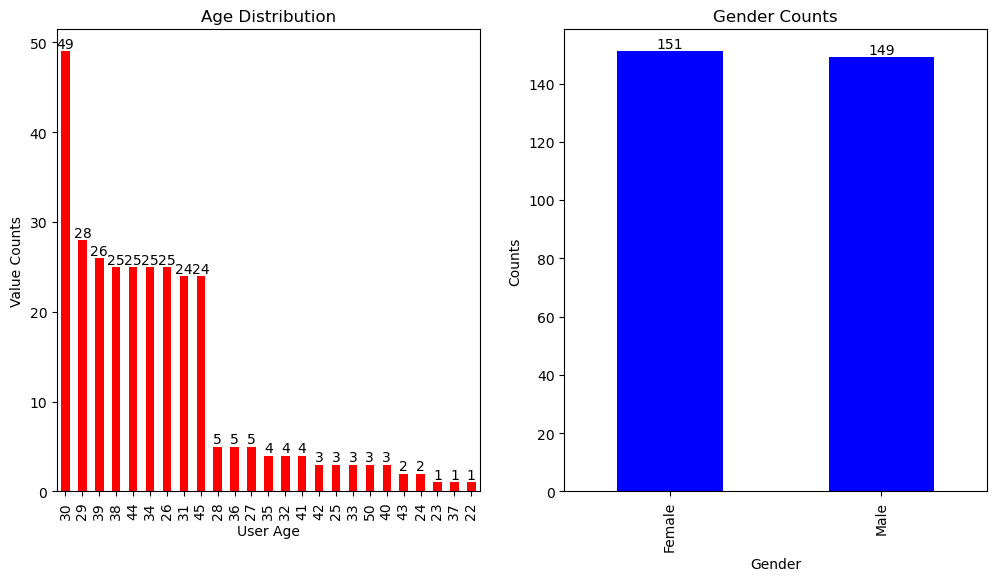

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
age_counts=df['user_age'].value_counts().plot.bar(xlabel='User Age', ylabel='Value Counts',color='red', title='Age Distribution')
age_counts.bar_label(age_counts.containers[0])

plt.subplot(1,2,2)
gender_counts=df['user_gender'].value_counts().plot.bar(xlabel='Gender',ylabel='Counts', title='Gender Counts',color='blue')
gender_counts.bar_label(gender_counts.containers[0])

plt.show()

## Ad performance category

In [16]:
df['ad_category'].unique()

array(['Electronics', 'Fashion', 'Home & Garden', 'Books', 'Toys',
       'Sports', 'Health', 'Automotive', 'Travel', 'Furniture'],
      dtype=object)

In [17]:
df['ad_category'].value_counts()

ad_category
Electronics      30
Fashion          30
Home & Garden    30
Books            30
Toys             30
Sports           30
Health           30
Automotive       30
Travel           30
Furniture        30
Name: count, dtype: int64

In [18]:
df.columns

Index(['id', 'user_id', 'ad_id', 'ad_category', 'ad_position', 'click',
       'impression_date', 'user_age', 'user_gender', 'user_location'],
      dtype='object')

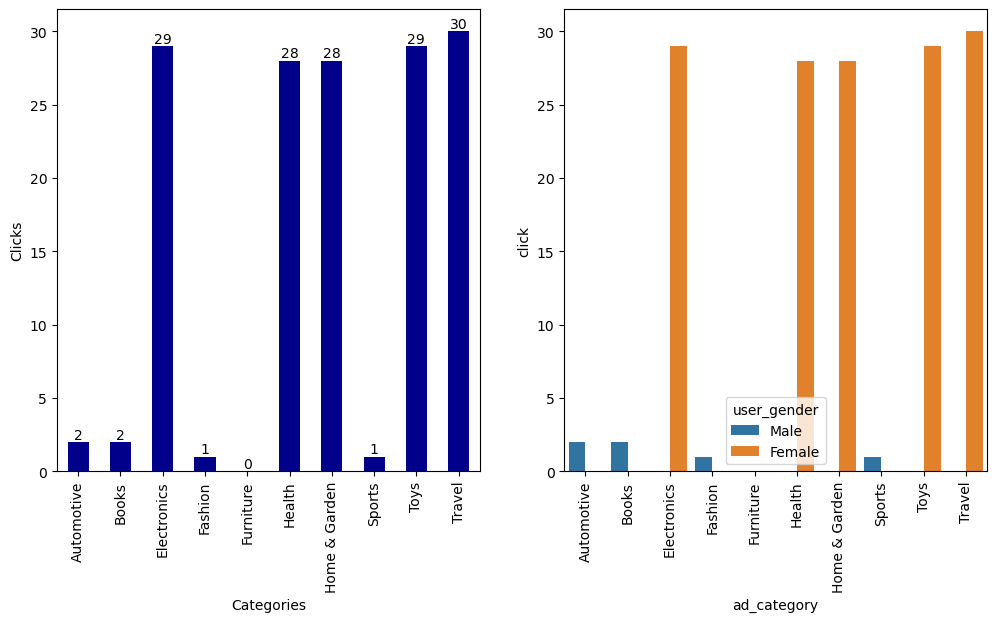

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
CTR_category=df.groupby('ad_category')['click'].sum().plot.bar(xlabel='Categories',ylabel='Clicks',color='darkblue')
CTR_category.bar_label(CTR_category.containers[0])

plt.subplot(1,2,2)
CTR_gender_category=df.groupby(['ad_category','user_gender'])['click'].sum().reset_index()
sns.barplot(data=CTR_gender_category, x='ad_category', y='click', hue='user_gender')
plt.xticks(rotation=90)


plt.show()

## Analyze by position

In [21]:
df['ad_position'].unique()

array(['Top', 'Side', 'Bottom'], dtype=object)

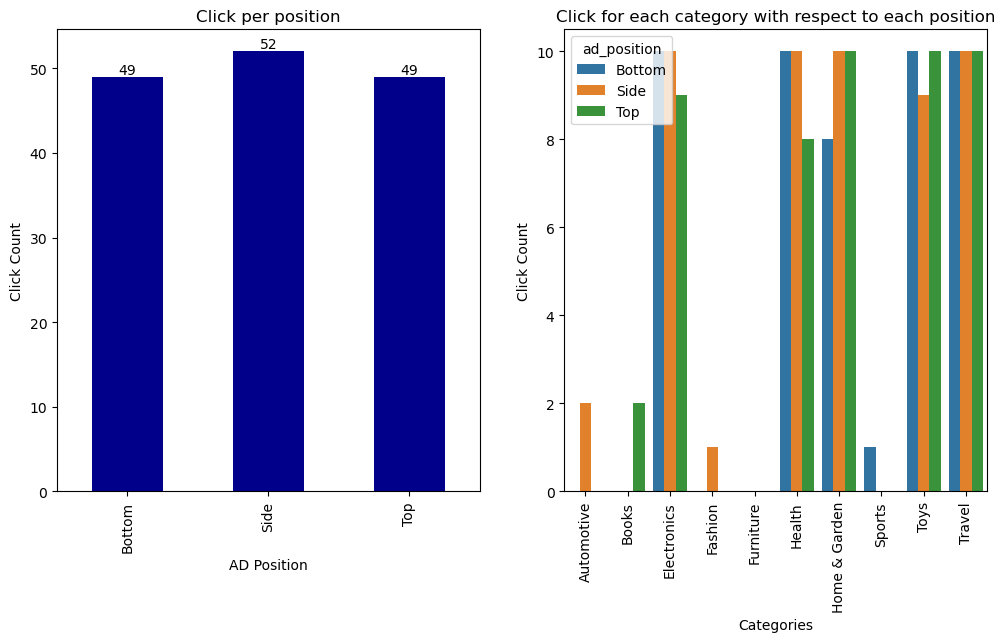

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
CTR_ad_positions=df.groupby('ad_position')['click'].sum().plot.bar(xlabel='AD Position',ylabel='Click Count', title='Click per position', color='darkblue')
CTR_ad_positions.bar_label(CTR_ad_positions.containers[0])

plt.subplot(1,2,2)
CTR_ad_position_categories=df.groupby(['ad_category','ad_position'])['click'].sum().reset_index()
sns.barplot(data=CTR_ad_position_categories, x='ad_category',y='click', hue='ad_position')
plt.xlabel('Categories')
plt.ylabel('Click Count')
plt.title('Click for each category with respect to each position')

plt.xticks(rotation=90)
plt.show()

## Geo targeting ads

In [24]:
df['user_location'].unique()

array(['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad',
       'Chennai', 'Kolkata', 'Pune', 'Jaipur', 'Lucknow', 'Surat',
       'Kanpur', 'Nagpur', 'Visakhapatnam', 'Indore', 'Thane', 'Bhopal',
       'Patna', 'Vadodara', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik',
       'Meerut', 'Faridabad', 'Rajkot', 'Varanasi', 'Srinagar',
       'Aurangabad', 'Solapur', 'Jodhpur', 'Amritsar', 'Ranchi',
       'Guwahati', 'Chandigarh', 'Mysore', 'Bareilly', 'Tirupati',
       'Aligarh', 'Moradabad', 'Jalandhar', 'Gorakhpur', 'Jamshedpur',
       'Hubli', 'Raipur', 'Gaya', 'Ujjain', 'Nellore', 'Dehradun',
       'Jammu', 'Madurai', 'Thiruvananthapuram', 'Mangalore', 'Kochi',
       'Gwalior', 'Sangli', 'Kalyan', 'Bhubaneswar', 'Salem',
       'Vijayawada', 'Durgapur', 'Agartala', 'Bikaner', 'Udaipur',
       'Puducherry', 'Jabalpur', 'Kota', 'Tiruppur', 'Gurgaon',
       'Coimbatore', 'Noida'], dtype=object)

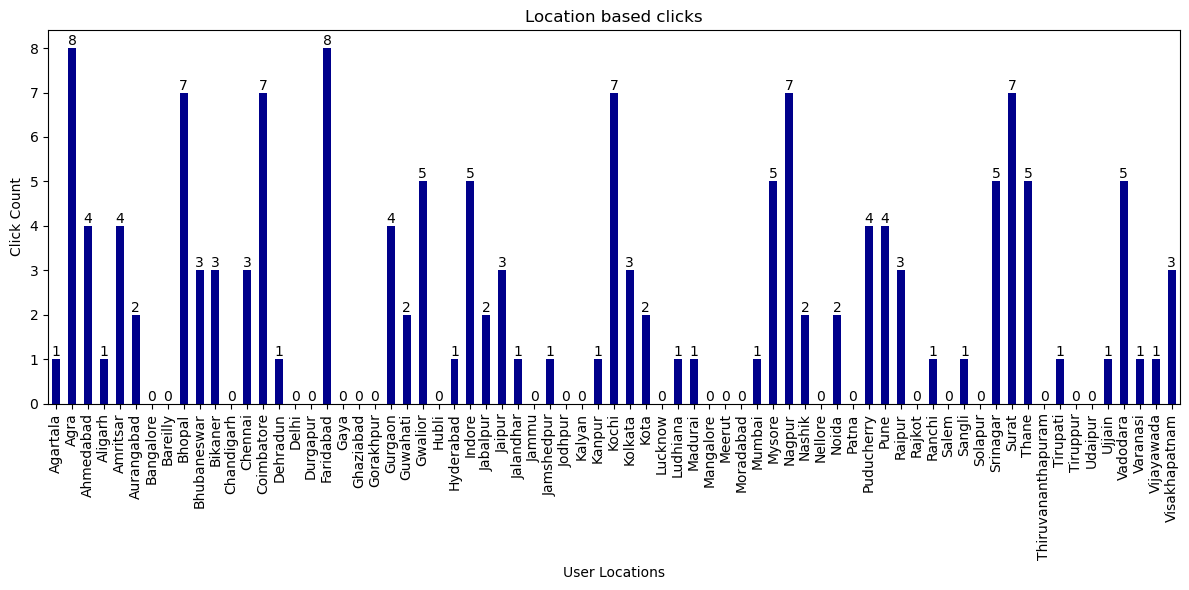

In [25]:
plt.figure(figsize=(12,6))
CTR_location=df.groupby('user_location')['click'].sum().plot.bar(xlabel='User Locations',ylabel='Click Count', title='Location based clicks', color='darkblue')
CTR_location.bar_label(CTR_location.containers[0])
plt.tight_layout()
plt.show()

# Analysis

## CTR by category Analysis

In [28]:
ctr_category=df.groupby('ad_category')['click'].agg(['sum','count']).reset_index()
ctr_category['CTR']=(ctr_category['sum']/ctr_category['count'])/100
ctr_category

,ad_category,sum,count,CTR
0,Automotive,2,30,0.000667
1,Books,2,30,0.000667
2,Electronics,29,30,0.009667
3,Fashion,1,30,0.000333
4,Furniture,0,30,0.000000
5,Health,28,30,0.009333
6,Home & Garden,28,30,0.009333
7,Sports,1,30,0.000333
8,Toys,29,30,0.009667
9,Travel,30,30,0.010000


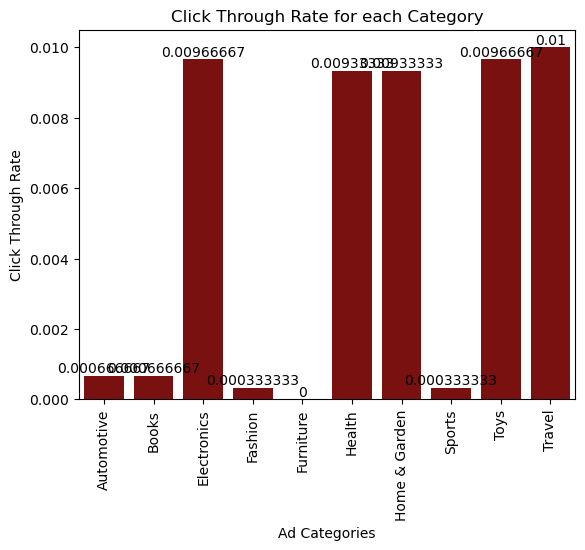

In [29]:
CTR_category_plot=sns.barplot(data=ctr_category, x='ad_category',y='CTR', color='darkred')
CTR_category_plot.bar_label(CTR_category_plot.containers[0])
plt.xlabel('Ad Categories')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Category")
plt.xticks(rotation=90)
plt.show()

## CTR by User Location

In [31]:
ctr_location=df.groupby('user_location')['click'].agg(['sum','count']).reset_index()
ctr_location['CTR']=(ctr_location['sum']/ctr_location['count'])/100
ctr_location

,user_location,sum,count,CTR
0,Agartala,1,2,0.005000
1,Agra,8,12,0.006667
2,Ahmedabad,4,10,0.004000
3,Aligarh,1,1,0.010000
4,Amritsar,4,4,0.010000
...,...,...,...,...
66,Ujjain,1,1,0.010000
67,Vadodara,5,11,0.004545
68,Varanasi,1,1,0.010000
69,Vijayawada,1,2,0.005000


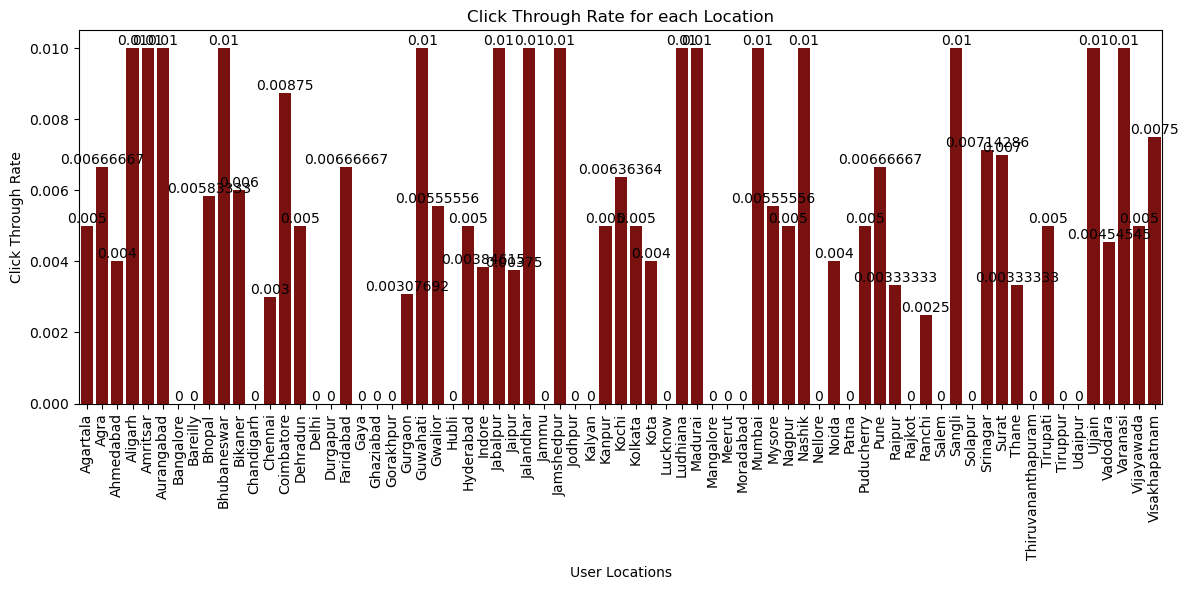

In [32]:
plt.figure(figsize=(12,6))
CTR_location_plot=sns.barplot(data=ctr_location, x='user_location',y='CTR', color='darkred')
CTR_location_plot.bar_label(CTR_location_plot.containers[0])
plt.xlabel('User Locations')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Location")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## CTR by Ad-Position

In [34]:
ctr_position=df.groupby('ad_position')['click'].agg(['sum','count']).reset_index()
ctr_position['CTR']=(ctr_position['sum']/ctr_position['count'])/100
ctr_position

,ad_position,sum,count,CTR
0,Bottom,49,100,0.0049
1,Side,52,100,0.0052
2,Top,49,100,0.0049


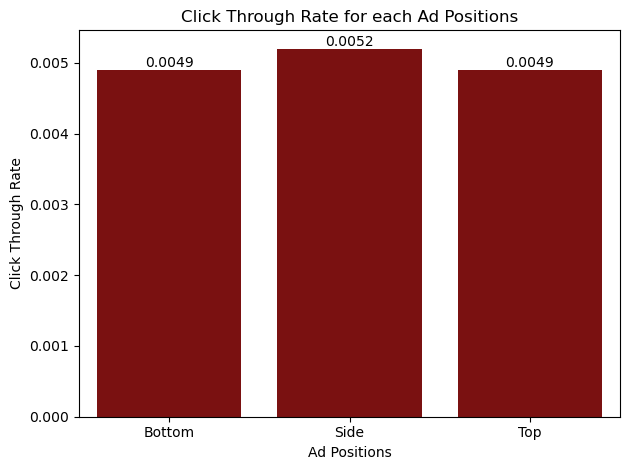

In [35]:
CTR_position_plot=sns.barplot(data=ctr_position, x='ad_position',y='CTR', color='darkred')
CTR_position_plot.bar_label(CTR_position_plot.containers[0])
plt.xlabel('Ad Positions')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Ad Positions")
plt.tight_layout()
plt.show()

## CTR by Age Group

In [37]:
ctr_age=df.groupby('user_age')['click'].agg(['sum','count']).reset_index()
ctr_age['CTR']=(ctr_age['sum']/ctr_age['count'])/100
ctr_age

,user_age,sum,count,CTR
0,22,0,1,0.000000
1,23,1,1,0.010000
2,24,1,2,0.005000
3,25,1,3,0.003333
4,26,23,25,0.009200
5,27,2,5,0.004000
6,28,4,5,0.008000
7,29,24,28,0.008571
8,30,2,49,0.000408
9,31,23,24,0.009583


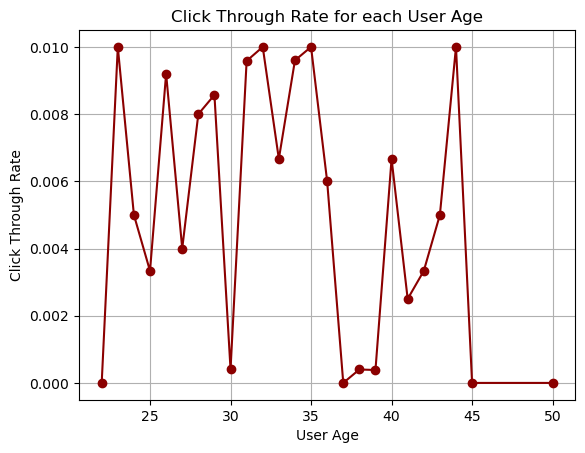

In [38]:
CTR_age_plot=plt.plot(ctr_age['user_age'],ctr_age['CTR'], marker='o', color='darkred')
plt.xlabel('User Age')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each User Age")
plt.grid(True)
plt.show()

## CTR by Gender

In [40]:
ctr_gender=df.groupby('user_gender')['click'].agg(['sum','count']).reset_index()
ctr_gender['CTR']=(ctr_gender['sum']/ctr_gender['count'])/100
ctr_gender

,user_gender,sum,count,CTR
0,Female,144,151,0.009536
1,Male,6,149,0.000403


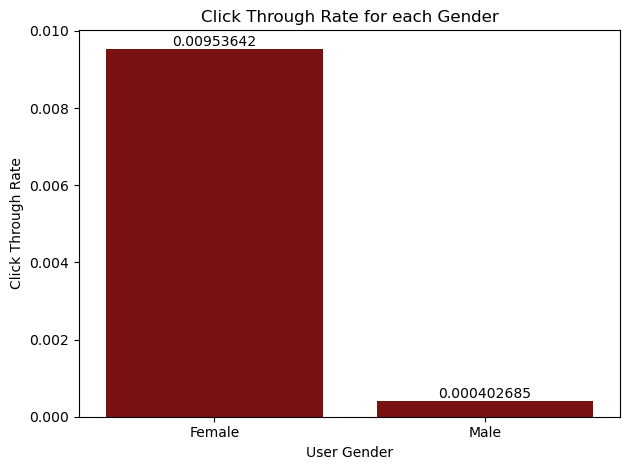

In [41]:
CTR_gender_plot=sns.barplot(data=ctr_gender, x='user_gender',y='CTR', color='darkred')
CTR_gender_plot.bar_label(CTR_gender_plot.containers[0])
plt.xlabel('User Gender')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Gender")
plt.tight_layout()
plt.show()

In [42]:
#All Charts

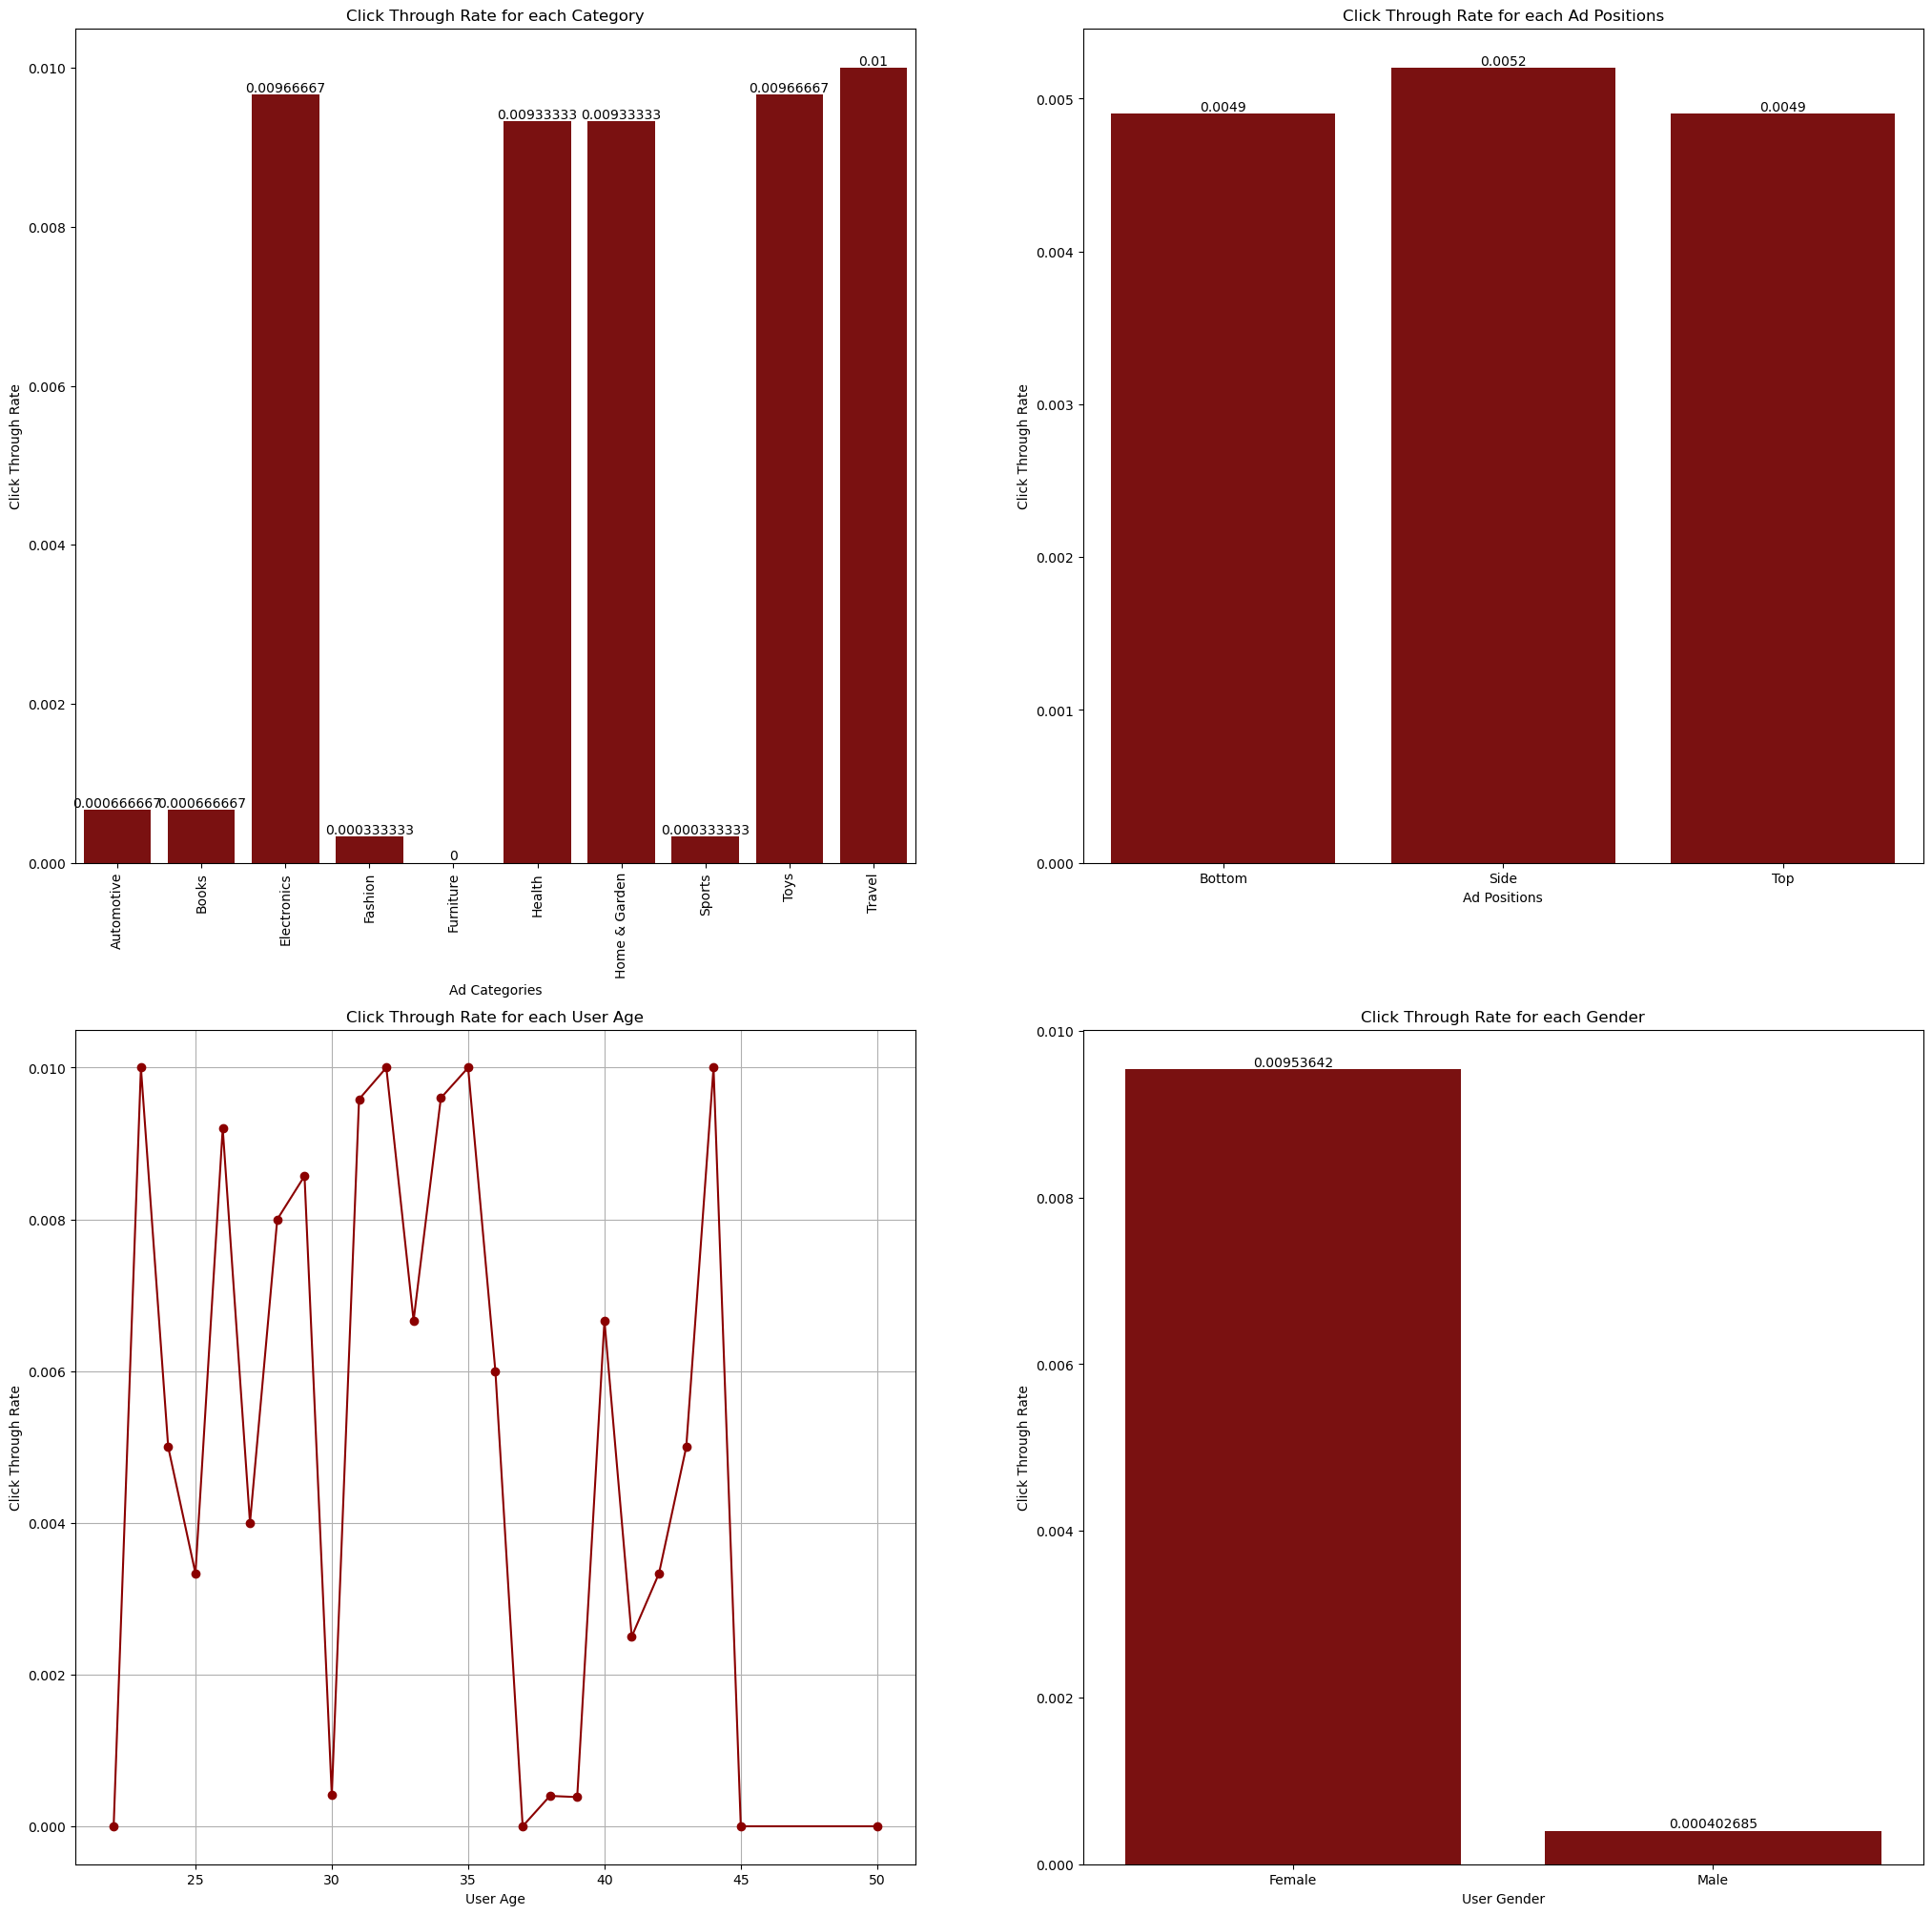

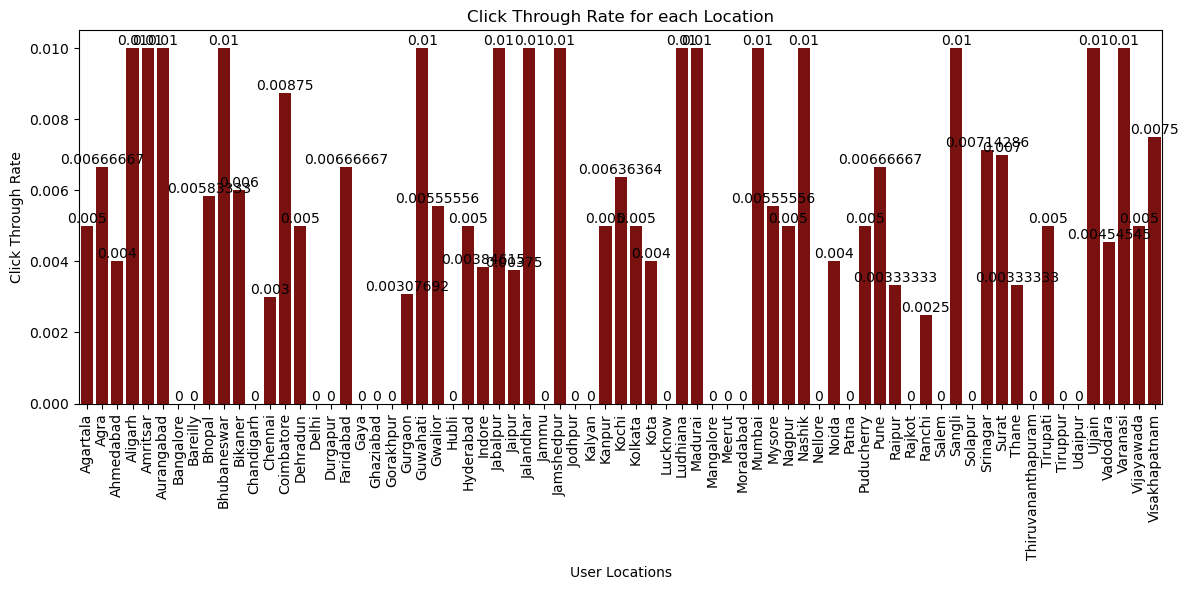

In [43]:
plt.figure(figsize=(25,25))

#CTR by category
plt.subplot(2,2,1)
CTR_category_plot=sns.barplot(data=ctr_category, x='ad_category',y='CTR', color='darkred')
CTR_category_plot.bar_label(CTR_category_plot.containers[0])
plt.xlabel('Ad Categories')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Category")
plt.xticks(rotation=90)

#CTR by Ad Positions
plt.subplot(2,2,2)
CTR_position_plot=sns.barplot(data=ctr_position, x='ad_position',y='CTR', color='darkred')
CTR_position_plot.bar_label(CTR_position_plot.containers[0])
plt.xlabel('Ad Positions')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Ad Positions")

#CTR by age
plt.subplot(2,2,3)
CTR_age_plot=plt.plot(ctr_age['user_age'],ctr_age['CTR'], marker='o', color='darkred')
plt.xlabel('User Age')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each User Age")
plt.grid(True)


#CTR By gender
plt.subplot(2,2,4)
CTR_gender_plot=sns.barplot(data=ctr_gender, x='user_gender',y='CTR', color='darkred')
CTR_gender_plot.bar_label(CTR_gender_plot.containers[0])
plt.xlabel('User Gender')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Gender")

#CTR by location

plt.figure(figsize=(12,6))
CTR_location_plot=sns.barplot(data=ctr_location, x='user_location',y='CTR', color='darkred')
CTR_location_plot.bar_label(CTR_location_plot.containers[0])
plt.xlabel('User Locations')
plt.ylabel('Click Through Rate')
plt.title("Click Through Rate for each Location")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Predictive Model

In [45]:
df.columns

Index(['id', 'user_id', 'ad_id', 'ad_category', 'ad_position', 'click',
       'impression_date', 'user_age', 'user_gender', 'user_location'],
      dtype='object')

In [84]:
df=df.merge(ctr_category[['ad_category','CTR']], how='left', on='ad_category', suffixes=('','_category'))
df=df.merge(ctr_location[['user_location','CTR']], how='left', on='user_location', suffixes=('','_location'))
df=df.merge(ctr_position[['ad_position','CTR']], how='left', on='ad_position', suffixes=('','_position'))
df=df.merge(ctr_age[['user_age','CTR']], how='left', on='user_age', suffixes=('','_age'))
df=df.merge(ctr_gender[['user_gender','CTR']], how='left',on='user_gender', suffixes=('','_gender'))

In [88]:
df.columns

Index(['id', 'user_id', 'ad_id', 'ad_category', 'ad_position', 'click',
       'impression_date', 'user_age', 'user_gender', 'user_location', 'CTR',
       'CTR_location', 'CTR_position', 'CTR_age', 'CTR_gender'],
      dtype='object')

In [90]:
df.head()

,id,user_id,ad_id,ad_category,ad_position,click,impression_date,user_age,user_gender,user_location,CTR,CTR_location,CTR_position,CTR_age,CTR_gender
0,1,101,201,Electronics,Top,1,2024-10-01,25,Female,Mumbai,0.009667,0.010,0.0049,0.003333,0.009536
1,2,102,202,Fashion,Side,0,2024-10-01,30,Female,Delhi,0.000333,0.000,0.0052,0.000408,0.009536
2,3,103,203,Home & Garden,Bottom,0,2024-10-01,22,Female,Bangalore,0.009333,0.000,0.0049,0.000000,0.009536
3,4,104,204,Books,Top,1,2024-10-01,28,Male,Hyderabad,0.000667,0.005,0.0049,0.008000,0.000403
4,5,105,205,Toys,Side,1,2024-10-01,35,Female,Ahmedabad,0.009667,0.004,0.0052,0.010000,0.009536


In [92]:
df_encoded=pd.get_dummies(df[['user_gender','ad_category','user_location','ad_position']],drop_first=True)

In [96]:
df_encoded['user_age']=df['user_age']
df_encoded['CTR_category'] = df['CTR']
df_encoded['CTR_location'] = df['CTR_location']
df_encoded['CTR_position'] = df['CTR_position']

In [98]:
df_encoded

,user_gender_Male,ad_category_Books,ad_category_Electronics,ad_category_Fashion,ad_category_Furniture,ad_category_Health,ad_category_Home & Garden,ad_category_Sports,ad_category_Toys,ad_category_Travel,...,user_location_Vadodara,user_location_Varanasi,user_location_Vijayawada,user_location_Visakhapatnam,ad_position_Side,ad_position_Top,user_age,CTR_category,CTR_location,CTR_position
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,25,0.009667,0.010000,0.0049
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,30,0.000333,0.000000,0.0052
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,22,0.009333,0.000000,0.0049
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,28,0.000667,0.005000,0.0049
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,35,0.009667,0.004000,0.0052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,39,0.000333,0.005833,0.0052
296,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,29,0.009333,0.007000,0.0049
297,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,30,0.000667,0.003750,0.0049
298,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,44,0.010000,0.005000,0.0052


In [102]:
x=df_encoded
y=df['click']

In [106]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [112]:
model=LogisticRegression()
model

LogisticRegression()

In [114]:
model.fit(x_train, y_train)

C:\Users\somra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
y_pred=model.predict(x_test)

In [118]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.56%


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        46

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

